In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [3]:
df.shape

(891, 12)

##### This dataset contains 891 rows and 12 columns, out of which one column represents the target variable and the remaining eleven columns are independent variables.

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Since the target value is located in the middle of the dataset, we will shift it to the 12th position.

In [5]:
y = df['Survived']
df.drop('Survived', axis=1, inplace=True)
df['Survived'] = y
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [7]:
df.isna().sum()
# Null values are present in the Age, Cabin, and Embarked columns.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [8]:
# Filling the NaN value by mean of Age column.
df['Age']=df['Age'].fillna(df['Age'].mean())

In [9]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [10]:
# Filling the NaN value by mode of Cabin column.
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode().iloc[0])

In [11]:
df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Survived       0
dtype: int64

In [12]:
# Filling the NaN value by mode of Embarked column.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [13]:
df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [14]:
# Now that we have filled all the null values, we need to check for any white spaces.
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [15]:
# Since the 'Age' column is currently in float type, we will convert it to integer type.
df['Age'] = df['Age'].astype('int64')

In [16]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [17]:
# Observing the non-null values present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


<Axes: >

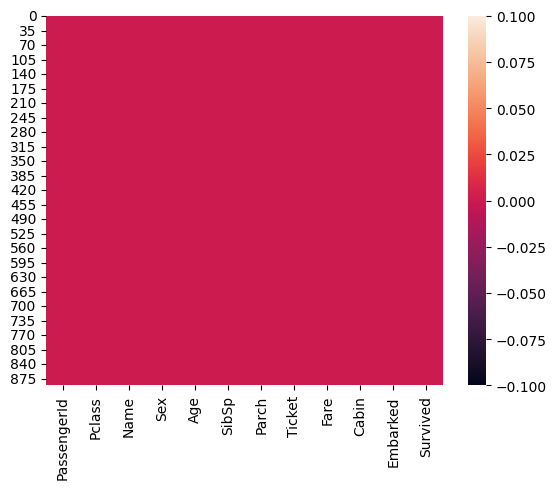

In [18]:
# The presence of non-null values is represented by the heatmap.
sns.heatmap(df.isnull())

In [19]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,0
5,6,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,B96 B98,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,B96 B98,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,B96 B98,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,B96 B98,C,1


In [20]:
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22,1,0,7.2500,S,0
1,1,female,38,1,0,71.2833,C,1
2,3,female,26,0,0,7.9250,S,1
3,1,female,35,1,0,53.1000,S,1
4,3,male,35,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27,0,0,13.0000,S,0
887,1,female,19,0,0,30.0000,S,1
888,3,female,29,1,2,23.4500,S,0
889,1,male,26,0,0,30.0000,C,1


In [22]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## There is no class imbalance observed.

In [23]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.544332,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.013778,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


#### We observed outliers in Age, SibSp, Parch, and Fare, which need to be addressed. Although there are no null values in this dataset, there is some skewness present. We will address these issues in subsequent steps.

### Univariate Analysis

Survived
0    549
1    342
Name: count, dtype: int64

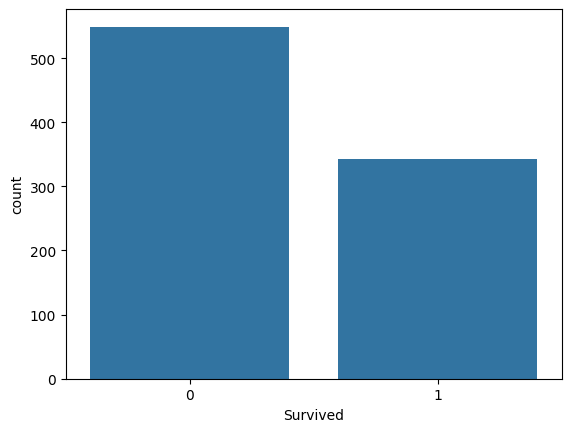

In [24]:
ax = sns.countplot(x= 'Survived', data=df)
df['Survived'].value_counts()

#### Checking outliers

Pclass         Axes(0.125,0.53;0.110714x0.35)
Age         Axes(0.257857,0.53;0.110714x0.35)
SibSp       Axes(0.390714,0.53;0.110714x0.35)
Parch       Axes(0.523571,0.53;0.110714x0.35)
Fare        Axes(0.656429,0.53;0.110714x0.35)
Survived    Axes(0.789286,0.53;0.110714x0.35)
dtype: object

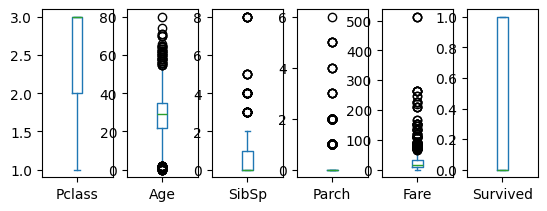

In [25]:
df.plot(kind = 'box', subplots=True,layout=(2,6))

In [26]:
# Encoding categorial columns using OrdinalEncodes
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1.0,22,1,0,7.2500,2.0,0
1,1,0.0,38,1,0,71.2833,0.0,1
2,3,0.0,26,0,0,7.9250,2.0,1
3,1,0.0,35,1,0,53.1000,2.0,1
4,3,1.0,35,0,0,8.0500,2.0,0
...,...,...,...,...,...,...,...,...
886,2,1.0,27,0,0,13.0000,2.0,0
887,1,0.0,19,0,0,30.0000,2.0,1
888,3,0.0,29,1,2,23.4500,2.0,0
889,1,1.0,26,0,0,30.0000,0.0,1


In [28]:
# Checking skewness
df.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.459563
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
Survived    0.478523
dtype: float64

In [29]:
# As observed, some parameters, such as 'Embarked,' exhibit values exceeding -0.5. Additionally, 
# skewness is evident in the plot presentation.

### Checking visualization presentation

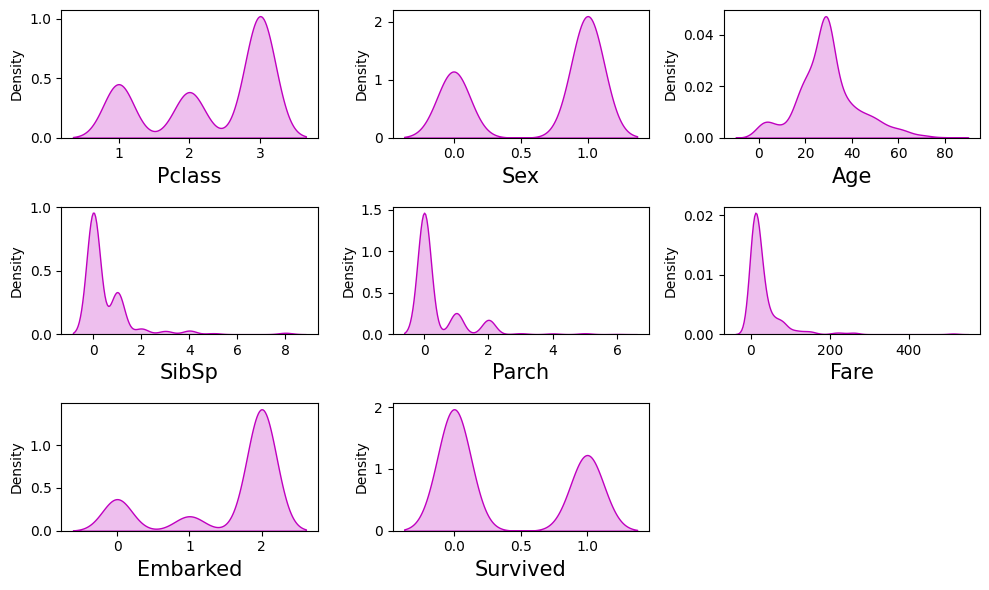

In [30]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [31]:
# Removing the skewness by using Cube root square.
df['SibSp'] = np.cbrt(df['SibSp'])

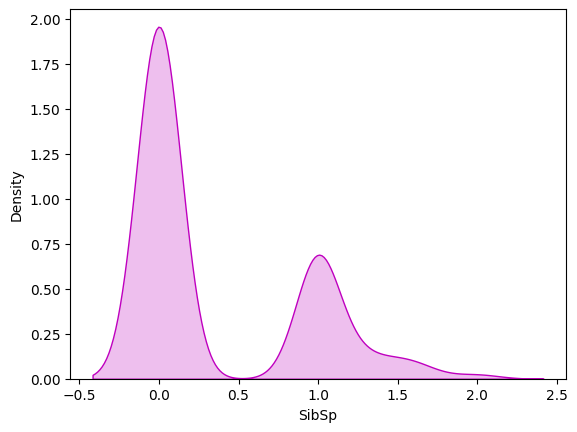

In [32]:
# After removing the skewness.
sns.distplot(df['SibSp'], color='m', kde_kws={'shade' : True}, hist=False)
plt.show()

In [33]:
# Removing the skewness by using Cube root square.
df['Parch'] = np.cbrt(df['Parch'])

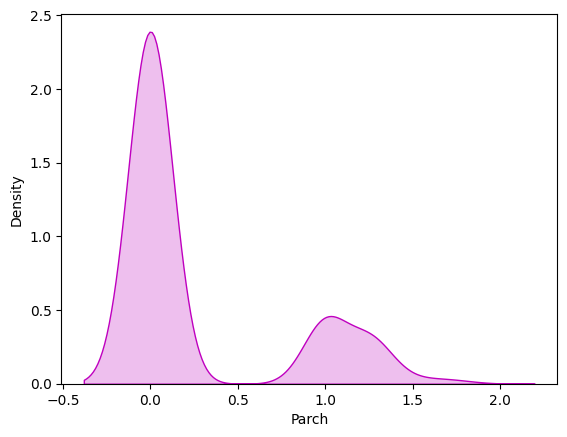

In [34]:
# After removing the skewness.
sns.distplot(df['Parch'], color='m', kde_kws={'shade' : True}, hist=False)
plt.show()

In [35]:
# Removing the skewness by using Cube root square.
df['Fare'] = np.cbrt(df['Fare'])

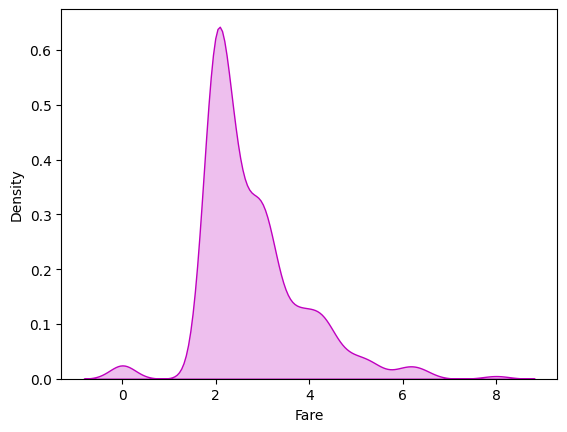

In [36]:
# After removing the skewness.
sns.distplot(df['Fare'], color='m', kde_kws={'shade' : True}, hist=False)
plt.show()

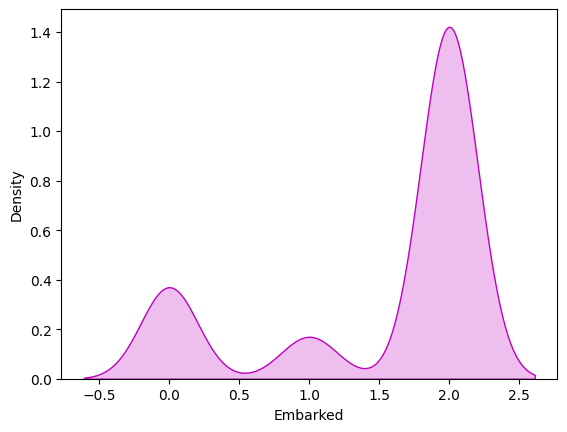

In [37]:
# Checking skewness.
sns.distplot(df['Embarked'], color='m', kde_kws={'shade' : True}, hist=False)
plt.show()

In [38]:
# Removing the skewness by using Cube root square.
df['Embarked'] = np.cbrt(df['Embarked'])

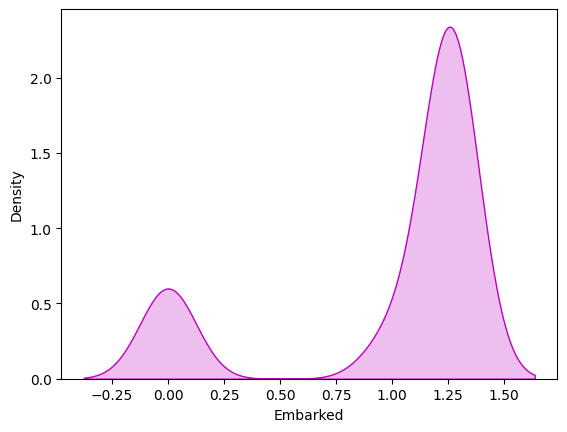

In [39]:
# Checking skewness.
sns.distplot(df['Embarked'], color='m', kde_kws={'shade' : True}, hist=False)
plt.show()

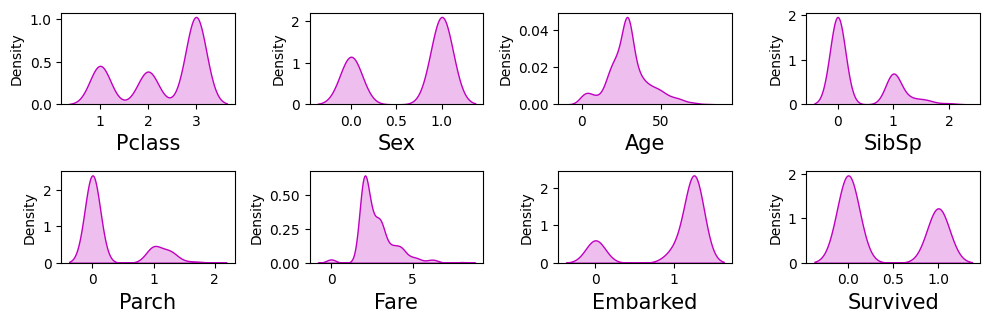

In [40]:
# Checking again all the columns of skewness.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [41]:
df.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.459563
SibSp       1.033059
Parch       1.348334
Fare        1.230382
Embarked   -1.520662
Survived    0.478523
dtype: float64

In [42]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.544332,0.357438,0.272415,2.765835,0.999898,0.383838
std,0.836071,0.477990,13.013778,0.541399,0.494092,1.072486,0.487649,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,1.992505,1.000000,0.000000
50%,3.000000,1.000000,29.000000,0.000000,0.000000,2.435929,1.259921,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,3.141381,1.259921,1.000000
max,3.000000,1.000000,80.000000,2.000000,1.817121,8.001714,1.259921,1.000000


### After removing all possible skewness, we now remove all the possible outliers.

In [43]:
# Removing outliers
df = df[(df['Age'] <= 3) & (df['Age'] >= -3)]

In [44]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.533333,0.600000,1.500000,0.991783,1.095304,3.027391,0.999273,0.666667
std,0.628810,0.498273,1.074789,0.557602,0.127396,0.746452,0.510370,0.479463
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.042163,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,1.000000,2.656646,1.259921,0.000000
50%,3.000000,1.000000,2.000000,1.000000,1.000000,2.962496,1.259921,1.000000
75%,3.000000,1.000000,2.000000,1.442250,1.259921,3.287865,1.259921,1.000000
max,3.000000,1.000000,3.000000,1.709976,1.259921,5.331532,1.259921,1.000000


Pclass         Axes(0.125,0.53;0.110714x0.35)
Sex         Axes(0.257857,0.53;0.110714x0.35)
Age         Axes(0.390714,0.53;0.110714x0.35)
SibSp       Axes(0.523571,0.53;0.110714x0.35)
Parch       Axes(0.656429,0.53;0.110714x0.35)
Fare        Axes(0.789286,0.53;0.110714x0.35)
Embarked       Axes(0.125,0.11;0.110714x0.35)
Survived    Axes(0.257857,0.11;0.110714x0.35)
dtype: object

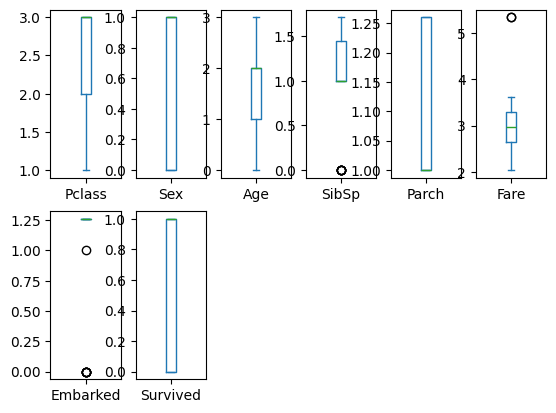

In [45]:
# After removing outliear.
df.plot(kind = 'box', subplots=True,layout=(2,6))

In [46]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,-0.176090,0.102044,0.159817,-0.208851,-0.649591,-0.121334,-0.304997
Sex,-0.176090,1.000000,-0.128778,0.112898,-0.084717,0.095468,0.259248,0.144338
Age,0.102044,-0.128778,1.000000,0.247955,-0.032729,-0.004240,0.308639,-0.267660
SibSp,0.159817,0.112898,0.247955,1.000000,-0.073506,0.284693,0.352345,-0.447367
Parch,-0.208851,-0.084717,-0.032729,-0.073506,1.000000,0.510982,-0.125805,-0.048912
Fare,-0.649591,0.095468,-0.004240,0.284693,0.510982,1.000000,0.165152,-0.236808
Embarked,-0.121334,0.259248,0.308639,0.352345,-0.125805,0.165152,1.000000,-0.330669
Survived,-0.304997,0.144338,-0.267660,-0.447367,-0.048912,-0.236808,-0.330669,1.000000


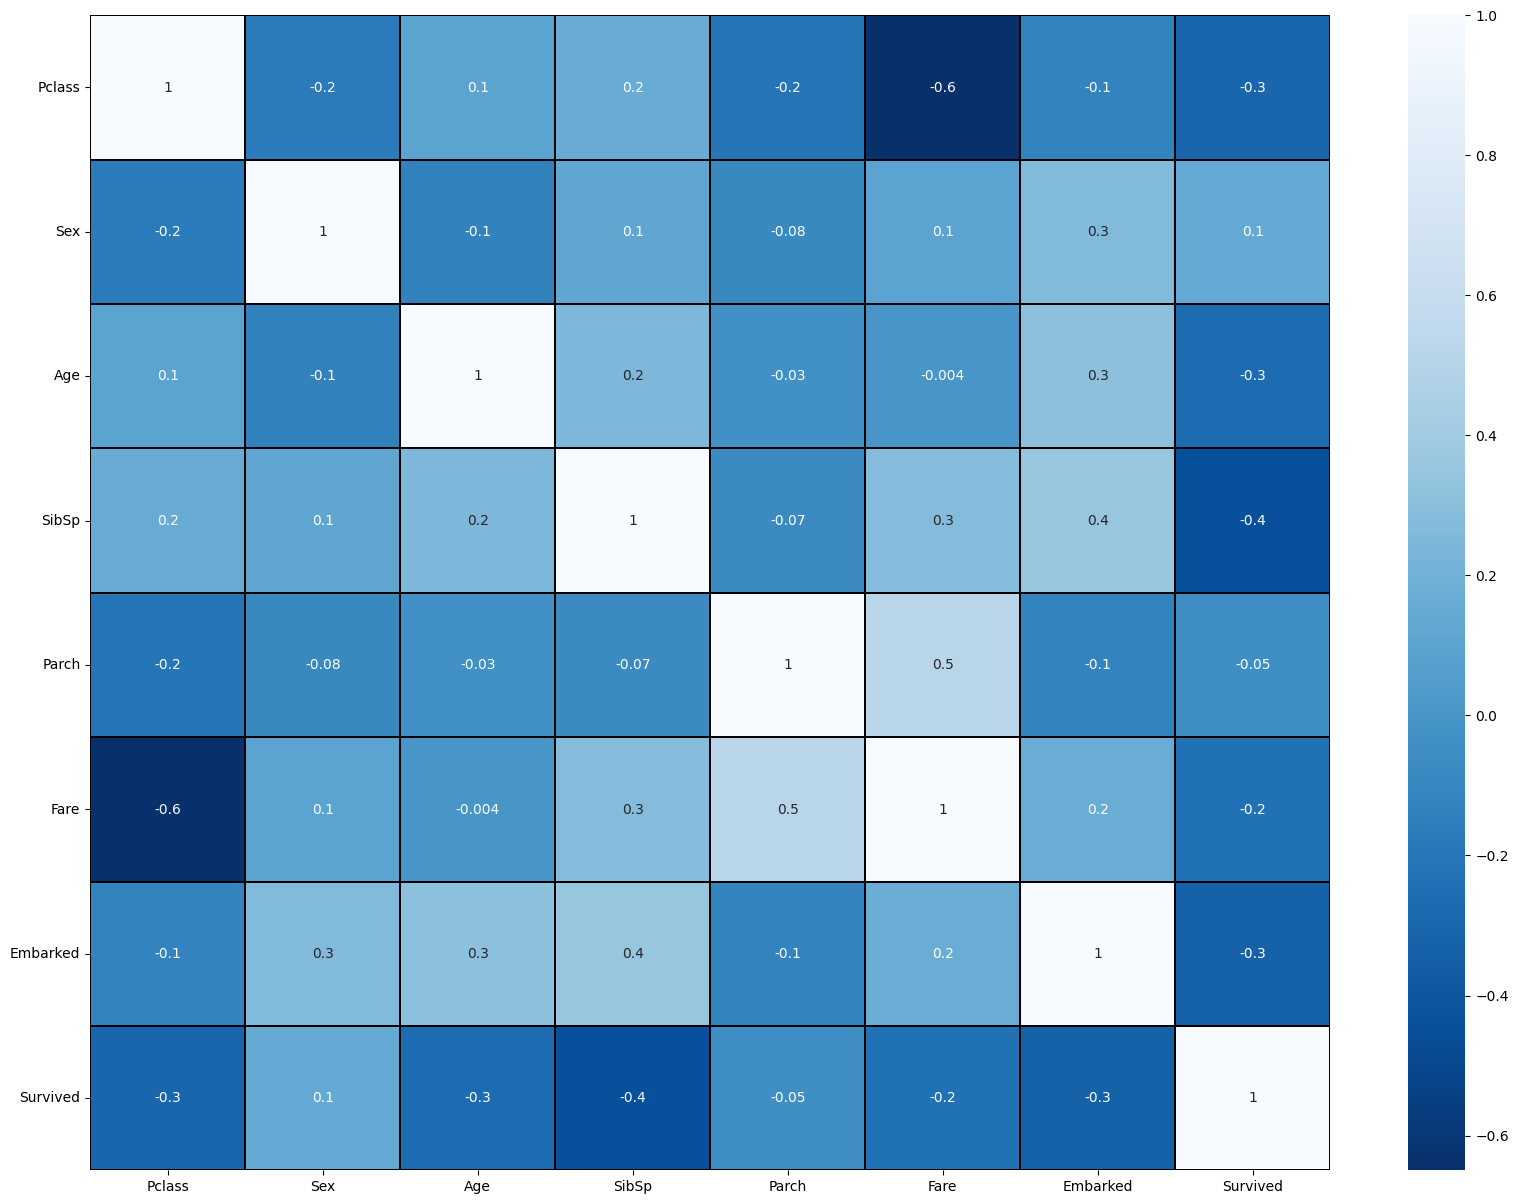

In [47]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

In [48]:
# We can observed that negative correlation with target value is present inside the data set.
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.144338
Parch      -0.048912
Fare       -0.236808
Age        -0.267660
Pclass     -0.304997
Embarked   -0.330669
SibSp      -0.447367
Name: Survived, dtype: float64

In [49]:
# Separating feature and label
x = df.drop('Survived', axis=1)
y = df['Survived']

In [50]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [51]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] = x.columns

In [52]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature
0,2.710128,Pclass
1,1.170875,Sex
2,1.213801,Age
3,1.925946,SibSp
4,1.717030,Parch
5,3.837678,Fare
6,1.387621,Embarked


In [53]:
# Now we can move to the model building
y.value_counts()

Survived
1    20
0    10
Name: count, dtype: int64

In [54]:
# We can see that there is no class imbalance in the target values.

### Modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RER = RandomForestClassifier()
    RER.fit(x_train, y_train)
    pred = RER.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  1.0 at random_state  3


In [56]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=maxRs)

In [57]:
# Classification Algorithmfrom
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

## RandomForestClassifier

In [58]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [59]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  100.0
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## ExtraTreesClassifier

In [60]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  88.88888888888889
[[2 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



## GradientBoostingClassifier

In [61]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  77.77777777777779
[[2 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



## BaggingClassifier

In [62]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  100.0
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## LogisticRegression

In [63]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  100.0
[[3 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## SVC

In [64]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  88.88888888888889
[[2 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



In [65]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[1.         0.83333333 0.66666667 0.83333333 1.        ]
0.8666666666666668


0.1333333333333332

In [66]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[1.         0.66666667 0.66666667 0.66666667 1.        ]
0.7999999999999999


0.0888888888888889

In [67]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.83333333 0.66666667 0.66666667 0.83333333 0.83333333]
0.7666666666666667


0.011111111111111072

In [68]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[1.         0.66666667 0.66666667 0.66666667 0.83333333]
0.7666666666666666


0.2333333333333334

In [69]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.5        0.83333333 0.66666667 1.         1.        ]
0.8


0.19999999999999996

In [70]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[1.         0.83333333 0.5        0.83333333 0.83333333]
0.8


0.0888888888888888

### As you can see our best model is RandomForestClassifier and LogisticRegression are the best model.

In [71]:
# Hyper Parameter Turning
# Random Forest Classifier
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' : ['gini', 'entropy'],
    'random_state' : [10, 50, 1000],
    'max_depth' : [0, 10, 20],
    'n_jobs' : [-2, -1, 1],
    'n_estimators' : [50, 100, 200, 300]
}
GCV = GridSearchCV(RandomForestClassifier(), parameter, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [72]:
Final_model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators= 100, n_jobs=-2, random_state=50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

1.0

## AUC and ROC

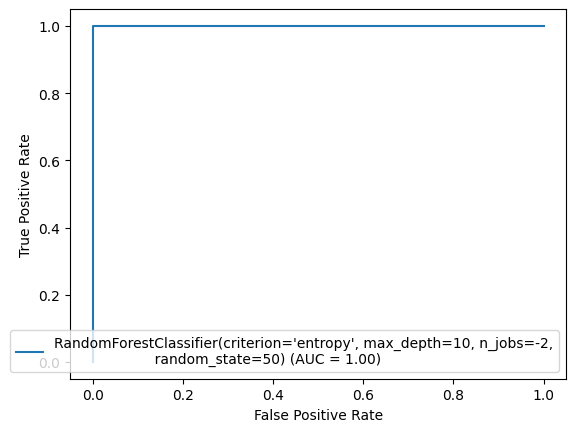

In [73]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

In [74]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, 'titanic_survived.pkl')

['titanic_survived.pkl']

In [75]:
# Predicting the saved model
model = joblib.load('titanic_survived.pkl')
prediction = model.predict(x_test)

In [76]:
# Confirming
a = np.array(y_test)
df = pd.DataFrame()
df['Predict'] = prediction
df['Original'] = a
df

,Predict,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
